In [1]:
from experiment import *

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

tf.get_logger().setLevel("ERROR")

# tf.config.set_visible_devices([], "GPU")

2022-07-04 00:00:41.796899: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 00:00:41.819416: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 00:00:41.819888: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
base_experiment_parameters = {
    "vocab_size": 3000,
    "sequence_length": 300,
    "hidden_layers": [3000, 1500],
    "embedding_dim": 2,
    "dropout_rate": 0.5,
}

experiment_parameters = {
    "vocab_size": 5168,
    "sequence_length": 515,
    "hidden_layers": [5168, 2584],
    "embedding_dim": 2,
    "dropout_rate": 0.5,
}

2022-07-04 00:00:52.150045: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-04 00:00:52.213254: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
352/352 [==============================] - 5s 12ms/step - loss: 0.6187 - accuracy: 0.6095 - val_loss: 0.3848 - val_accuracy: 0.8424
Epoch 2/5
352/352 [==============================] - 4s 12ms/step - loss: 0.4360 - accuracy: 0.7680 - val_loss: 0.3247 - val_accuracy: 0.8716
Epoch 3/5
352/352 [==============================] - 4s 12ms/step - loss: 0.3945 - accuracy: 0.7925 - val_loss: 0.3120 - val_accuracy: 0.8704
Epoch 4/5
352/352 [==============================] - 4s 12ms/step - loss: 0.3844 - accuracy: 0.7976 - val_loss: 0.3028 - val_accuracy: 0.8760
Epoch 5/5
782/782 [==============================] - 1s 2ms/step - loss: 0.2943 - accuracy: 0.8772
Final accuracy: train 0.7997 validation 0.8792 test 0.8772


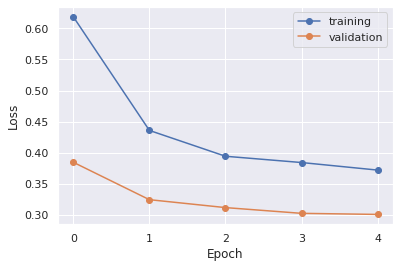

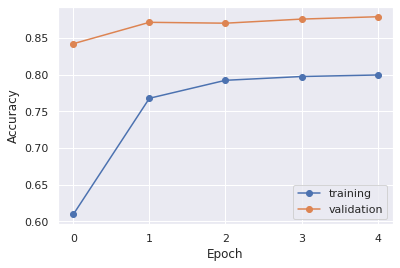

Final training accuracy: 0.7997
Final validation accuracy: 0.8792
Model parameter count: 4,518,001


(<keras.engine.sequential.Sequential at 0x7f32bccacca0>,
 0.8791999816894531,
 0.8772000074386597)

In [4]:
experiment(**base_experiment_parameters, verbose=1)

Epoch 1/5
352/352 [==============================] - 14s 38ms/step - loss: 0.6732 - accuracy: 0.5448 - val_loss: 0.4799 - val_accuracy: 0.8224
Epoch 2/5
352/352 [==============================] - 13s 38ms/step - loss: 0.4555 - accuracy: 0.7595 - val_loss: 0.3220 - val_accuracy: 0.8732
Epoch 3/5
352/352 [==============================] - 13s 38ms/step - loss: 0.3904 - accuracy: 0.7920 - val_loss: 0.3000 - val_accuracy: 0.8852
Epoch 4/5
352/352 [==============================] - 13s 38ms/step - loss: 0.3723 - accuracy: 0.8018 - val_loss: 0.2926 - val_accuracy: 0.8860
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.2849 - accuracy: 0.8875
Final accuracy: train 0.8076 validation 0.8928 test 0.8875


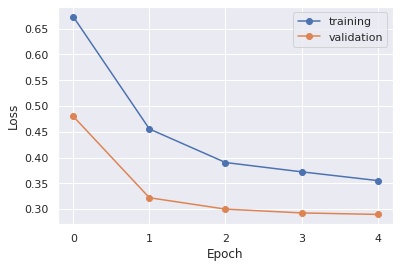

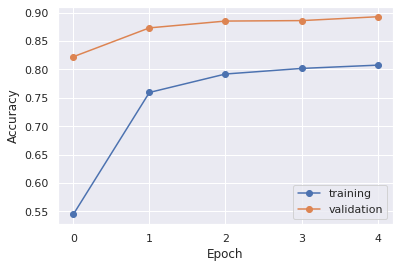

Final training accuracy: 0.8076
Final validation accuracy: 0.8928
Model parameter count: 13,385,121


(<keras.engine.sequential.Sequential at 0x7f32bccac7c0>,
 0.892799973487854,
 0.8874800205230713)

In [5]:
experiment(**experiment_parameters, verbose=1)

In [ ]:
results, max_value_key = next_step(**experiment_parameters, verbose=0, test_run=False)

In [ ]:
[(key, val) for key, val in results.items() if val > .891]

In [ ]:
#for _ in range(10):
#    (
#        next_sequence_length,
#        next_vocab_size,
#        next_hidden_units,
#        next_embeddings,
#    ) = next_step(sequence_length, vocab_size, hidden_units, embeddings, 1.25)

#    if (
#        next_sequence_length == sequence_length
#        and next_vocab_size == vocab_size
#        and next_hidden_units == hidden_units
#        and next_embeddings == embeddings
#    ):
#        break

#    sequence_length = next_sequence_length
#    vocab_size = next_vocab_size
#    hidden_units = next_hidden_units
#    embeddings = next_embeddings